In [1]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np


In [18]:
# loading the data 
depression = pd.read_csv("data/Student Depression Dataset.csv")
depression = depression.dropna()
depression = depression.replace({'Yes': 1, 'No': 0})
depression_onehot = pd.get_dummies(depression, drop_first = True)

depression_LASSO_features = depression_onehot[['Academic Pressure', 'Have you ever had suicidal thoughts ?',
 'Financial Stress', 'City_Ahmedabad', 'City_Bhopal', 'City_Faridabad',
 'City_Hyderabad', 'City_Meerut', 'City_Patna', 'Dietary Habits_Moderate',
 'Dietary Habits_Others', 'Dietary Habits_Unhealthy', 'Depression']]

depression_LASSO_features.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,City_Ahmedabad,City_Bhopal,City_Faridabad,City_Hyderabad,City_Meerut,City_Patna,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Depression
0,5.0,1,1.0,0,0,0,0,0,0,0,0,0,1
1,2.0,0,2.0,0,0,0,0,0,0,1,0,0,0
2,3.0,0,1.0,0,0,0,0,0,0,0,0,0,0
3,3.0,1,5.0,0,0,0,0,0,0,1,0,0,1
4,4.0,1,1.0,0,0,0,0,0,0,1,0,0,0


In [19]:
depression_LASSO_features['Financial Stress'] = depression_LASSO_features['Financial Stress'].astype(int)
depression_LASSO_features['Depression'] = depression_LASSO_features['Depression'].astype(int)
depression_LASSO_features['City_Ahmedabad'] = depression_LASSO_features['City_Ahmedabad'].astype(int)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_27244\854217507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_LASSO_features['Financial Stress'] = depression_LASSO_features['Financial Stress'].astype(int)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_27244\854217507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_LASSO_features['Depression'] = depression_LASSO_features['Depression'].astype(int)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_27244\854217507.py:3: SettingWithCopyWarning

In [40]:
depression_LASSO_features['Financial Stress Binary'] = (depression_LASSO_features['Financial Stress'] > depression_LASSO_features['Financial Stress'].median()).astype(int)
depression_LASSO_features['Academic Pressure Binary'] = (depression_LASSO_features['Academic Pressure'] > depression_LASSO_features['Academic Pressure'].median()).astype(int)


C:\Users\Kevin\AppData\Local\Temp\ipykernel_27244\2820047431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_LASSO_features['Financial Stress Binary'] = (depression_LASSO_features['Financial Stress'] > depression_LASSO_features['Financial Stress'].median()).astype(int)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_27244\2820047431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_LASSO_features['Academic Pressure Binary'] = (depression_LASSO_features['Academic Pressure'] > depressi

In [26]:
depression_LASSO_features

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,City_Ahmedabad,City_Bhopal,City_Faridabad,City_Hyderabad,City_Meerut,City_Patna,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Depression,Financial Stress Binary
0,5.0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,2.0,0,2,0,0,0,0,0,0,1,0,0,0,0
2,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3.0,1,5,0,0,0,0,0,0,1,0,0,1,1
4,4.0,1,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,5.0,1,1,0,0,0,0,0,0,0,0,1,0,0
27897,2.0,0,3,0,0,0,0,0,0,0,0,0,0,0
27898,3.0,0,2,0,0,1,0,0,0,0,0,1,0,0
27899,5.0,1,5,0,0,0,0,0,0,0,0,0,1,1


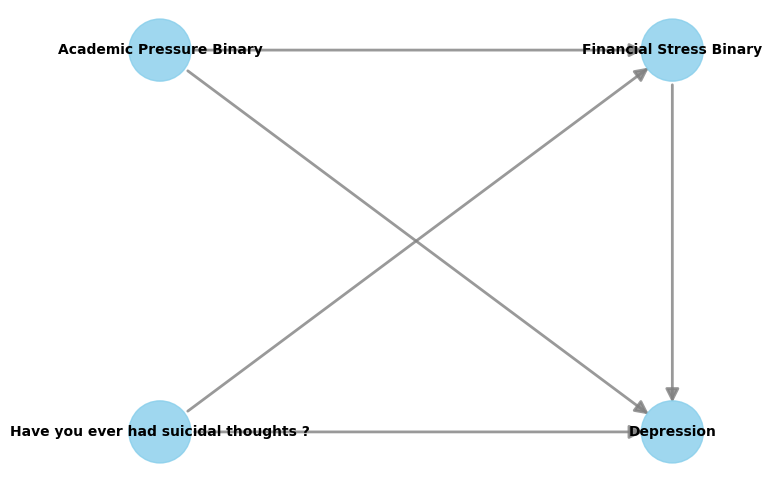

In [41]:
# Define the causal model
model = CausalModel(
    data=depression_LASSO_features,
    treatment='Financial Stress Binary',
    outcome='Depression',
    common_causes=['Academic Pressure Binary', 'Have you ever had suicidal thoughts ?']
)

# View causal graph
model.view_model()

In [42]:
# Estimate treatment effect
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")
print("Treatment Effect Estimate:")
print(estimate)

# Estimate effect with intervention
estimate_with_intervention = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1
)
print("Effect Estimate with Intervention:")
print(estimate_with_intervention)

Treatment Effect Estimate:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                  ↪
──────────────────────────(E[Depression|Have you ever had suicidal thoughts ?, ↪
d[Financial Stress Binary]                                                     ↪

↪                           
↪ Academic Pressure Binary])
↪                           
Estimand assumption 1, Unconfoundedness: If U→{Financial Stress Binary} and U→Depression then P(Depression|Financial Stress Binary,Have you ever had suicidal thoughts ?,Academic Pressure Binary,U) = P(Depression|Financial Stress Binary,Have you ever had suicidal thoughts ?,Academic Pressure Binary)

## Realized estimand
b: Depression~Financial Stress Binary+Have you ever had suicidal thoughts ?+Academic Pressure Binary
Target units: ate

## Estimate
Mean value: 0.19639400673883434

In [43]:
from dowhy.causal_refuters import CausalRefuter

refute = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute)


Refute: Use a Placebo Treatment
Estimated effect:0.19639400673883434
New effect:0.004421822352856838
p value:0.98



This essentially replaces Financial Stress with a pool of random numbers then gets a # close to zero, meaning that Financial Stress did impact depression

✅ Your model is robust! The placebo treatment refuter shows that your estimated causal effect (0.1964) is not random and likely reflects a true causal relationship between Financial Stress and Depression.